# Bondongo-Gruppe

* [Funde](#Funde)
    * [Befunde](#Befunde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
    * [Matrix mit allen Pos & Verz](#Matrix-mit-allen-Pos-&-Verz)
* [Verbreitung](#Verbreitung)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'BDG'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Formen

In [6]:
sql = """SELECT
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Ort.ort_fluss,
           t_Komplex.bef_nr,
           t_Komplex.bef_art,
           t_Obj.objID,
           t_Obj.Scherbe,
           t_Obj.Anzahl,
           t_Obj.Form_Gef,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [7]:
a = pd.Series({'GE':np.sum(df['Anzahl'].loc[df['Anzahl'] == 1]),
               'Ausgezählt':np.sum(df['Anzahl'].loc[df['Anzahl'] != 1])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Ausgezählt,21,28.378378
GE,53,71.621622


In [8]:
df_pivot = df.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

Anzahl    Prozent
ort_fluss     Ort                 bef_nr                   
Likwala-Esobe Ebambe (Fpl. 297)   87/101       1   1.351351
Sangha        Bobusa (Fpl. 239)   87/102       2   2.702703
              Bonga (Fpl. 238)    87/101       1   1.351351
              Inyenge (Fpl. 249)  87/101       5   6.756757
              Mitula (Fpl. 251)   87/102       1   1.351351
              Pikunda (Fpl. 255)  87/101       5   6.756757
              Sosolo (Fpl. 241)   87/101       4   5.405405
Ubangi        Bobangi (Fpl. 189)  85/101       1   1.351351
              Loka (Fpl. 193)     85/101       9  12.162162
              Ngbanja (Fpl. 199)  85/101      16  21.621622
              Zamba (Fpl. 191)    85/101       1   1.351351
Zaire/Kongo   Gombe (Fpl. 237)    87/101       1   1.351351
              Lukolela (Fpl. 234) 87/101       4   5.405405
              Maberu (Fpl. 235)   87/101      21  28.378378
              Sungu (Fpl. 236)    87/101       2   2.702703

In [9]:
# nur einzeln aufgenommene GE
df_ge = df.loc[df['Anzahl'] == 1]

In [10]:
df_pivot = df_ge.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], columns='Typ', aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot

Anzahl                           \
Typ                                      BBS/BDG (?)  BDG BDG (?) BDG/BBS (?)   
ort_fluss     Ort                 bef_nr                                        
Likwala-Esobe Ebambe (Fpl. 297)   87/101         NaN  NaN     NaN         NaN   
Sangha        Bobusa (Fpl. 239)   87/102         1.0  NaN     1.0         NaN   
              Bonga (Fpl. 238)    87/101         NaN  1.0     NaN         NaN   
              Inyenge (Fpl. 249)  87/101         NaN  NaN     2.0         NaN   
              Mitula (Fpl. 251)   87/102         NaN  NaN     1.0         NaN   
              Pikunda (Fpl. 255)  87/101         NaN  NaN     1.0         NaN   
              Sosolo (Fpl. 241)   87/101         NaN  NaN     4.0         NaN   
Ubangi        Bobangi (Fpl. 189)  85/101         NaN  NaN     NaN         NaN   
              Loka (Fpl. 193)     85/101         NaN  6.0     1.0         NaN   
              Ngbanja (Fpl. 199)  85/101         NaN  4.0     2.0         NaN   
              Zamba (Fpl. 191)    85/101         NaN  NaN     1.0         NaN   
Zaire/Kongo   Gombe (Fpl. 237)    87/101         NaN  NaN     NaN         NaN   
              Lukolela (Fpl. 234) 87/101         NaN  NaN     1.0         NaN   
              Maberu (Fpl. 235)   87/101         NaN  NaN    13.0         2.0   

                                                                              \
Typ                                      BDG/MBA (?) BOT/BDG (?) EBA/BDG (?)   
ort_fluss     Ort                 bef_nr                                       
Likwala-Esobe Ebambe (Fpl. 297)   87/101         1.0         NaN         NaN   
Sangha        Bobusa (Fpl. 239)   87/102         NaN         NaN         NaN   
              Bonga (Fpl. 238)    87/101         NaN         NaN         NaN   
              Inyenge (Fpl. 249)  87/101         3.0         NaN         NaN   
              Mitula (Fpl. 251)   87/102         NaN         NaN         NaN   
              Pikunda (Fpl. 255)  87/101         NaN         1.0         2.0   
              Sosolo (Fpl. 241)   87/101         NaN         NaN         NaN   
Ubangi        Bobangi (Fpl. 189)  85/101         NaN         NaN         1.0   
              Loka (Fpl. 193)     85/101         NaN         NaN         NaN   
              Ngbanja (Fpl. 199)  85/101         NaN         NaN         NaN   
              Zamba (Fpl. 191)    85/101         NaN         NaN         NaN   
Zaire/Kongo   Gombe (Fpl. 237)    87/101         NaN         NaN         NaN   
              Lukolela (Fpl. 234) 87/101         NaN         NaN         NaN   
              Maberu (Fpl. 235)   87/101         2.0         NaN         NaN   

                                                                  
Typ                                      IMB/BDG (?) MDB/BDG (?)  
ort_fluss     Ort                 bef_nr                          
Likwala-Esobe Ebambe (Fpl. 297)   87/101         NaN         NaN  
Sangha        Bobusa (Fpl. 239)   87/102         NaN         NaN  
              Bonga (Fpl. 238)    87/101         NaN         NaN  
              Inyenge (Fpl. 249)  87/101         NaN         NaN  
              Mitula (Fpl. 251)   87/102         NaN         NaN  
              Pikunda (Fpl. 255)  87/101         NaN         1.0  
              Sosolo (Fpl. 241)   87/101         NaN         NaN  
Ubangi        Bobangi (Fpl. 189)  85/101         NaN         NaN  
              Loka (Fpl. 193)     85/101         NaN         NaN  
              Ngbanja (Fpl. 199)  85/101         NaN         NaN  
              Zamba (Fpl. 191)    85/101         NaN         NaN  
Zaire/Kongo   Gombe (Fpl. 237)    87/101         1.0         NaN  
              Lukolela (Fpl. 234) 87/101         NaN         NaN  
              Maberu (Fpl. 235)   87/101         NaN         NaN

In [11]:
a = pd.Series({'sicher':np.sum(df_ge['Anzahl'].loc[df_ge['Typ'] == style]),
               'fraglich':np.sum(df_ge['Anzahl'].loc[df_ge['Typ'].str.contains(' ')])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,42,79.245283
sicher,11,20.754717


In [12]:
# nur ausgezählte Stücke
df_a = df.loc[df['Anzahl'] != 1]

In [13]:
df_a.pivot_table(values = 'Anzahl', index = 'Typ', columns = 'Scherbe', aggfunc = np.sum, margins = True)

Scherbe,R,W,All
Typ,,,
BDG,2.0,8.0,10.0
BDG (?),NaN,9.0,9.0
BDG/BOT (?),NaN,2.0,2.0
All,2.0,19.0,21.0


In [14]:
df_pivot = df_a.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum, fill_value = '')
df_pivot

Anzahl
ort_fluss   Ort                 bef_nr        
Ubangi      Loka (Fpl. 193)     85/101       2
            Ngbanja (Fpl. 199)  85/101      10
Zaire/Kongo Lukolela (Fpl. 234) 87/101       3
            Maberu (Fpl. 235)   87/101       4
            Sungu (Fpl. 236)    87/101       2

### Befunde

In [15]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'bef_art', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
bef_art,,
Oberfl,74,100.0


Nur die Stücke aus den Gräbern:

In [16]:
df[df['bef_art'] == 'Grube']

,ort_kurz,Ort,ort_fluss,bef_nr,bef_art,objID,Scherbe,Anzahl,Form_Gef,Typ


## Scherbentypen

In [17]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
# df_pivot['B'] = 0.
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
G,NaN,NaN
R,17.0,22.972973
W,56.0,75.675676
B,1.0,1.351351


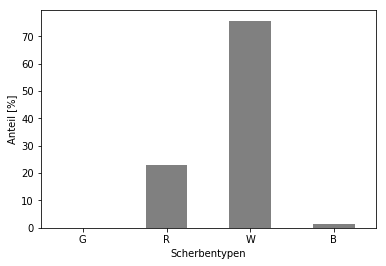

In [18]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
plt.show()

## Fragmentierung

In [19]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Gr_Clist,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)
#display(df.head())

In [20]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Gr_Clist', aggfunc = np.sum)
#df_pivot['B'] = 0.
custom_dict = {'30':0, 70:1, 120:3,200:4,'>200':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
#df_pivot

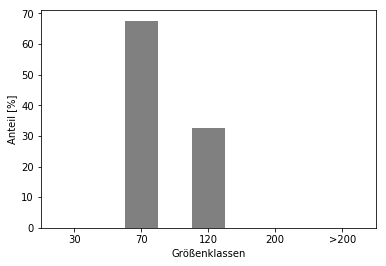

In [21]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Größenklassen')
plt.ylabel('Anteil [%]')
plt.show()

In [22]:
df_pivot

,Anzahl,Prozent
30,NaN,NaN
70,25.0,67.567568
120,12.0,32.432432
200,NaN,NaN
>200,NaN,NaN


## Technologische Merkmale (*fabrics*)

In [23]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [24]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


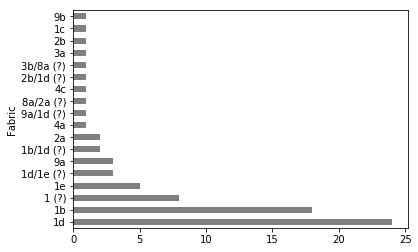

In [25]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [26]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
1d,24,32.000000
1b,18,24.000000
1 (?),8,10.666667
1e,5,6.666667
1d/1e (?),3,4.000000


In [27]:
df1 = df.dropna(subset = ['Fabric'])

a = pd.Series({'1':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("1")]),
               '2':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("2")]),
               '3':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("3")]),
               '4':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("4")]),
               '5':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("5")]),
               '6':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("6")]),
               '7':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("7")]),
               '8':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("8")]),
               '9':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("9")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
1,63,79.746835
2,5,6.329114
3,2,2.531646
4,2,2.531646
5,0,0.000000
6,0,0.000000
7,0,0.000000
8,2,2.531646
9,5,6.329114


In [28]:
df = df.replace('<1','sehr wenig', regex=True)

a = df.loc[df['MagerungDichte'] != ''] # nur Einträgen, bei denen diese Felder ausgefüllt sind
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
sehr wenig,25,69.444444
wenig,3,8.333333
mittel,3,8.333333
viel,3,8.333333
sehr viel,2,5.555556


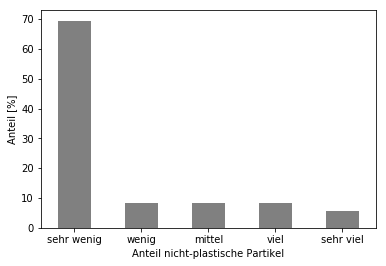

In [29]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Anteil nicht-plastische Partikel')
plt.ylabel('Anteil [%]')
plt.show()

In [30]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
custom_dict = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
VF,23,63.888889
F,3,8.333333
M,1,2.777778
C,7,19.444444
VC,2,5.555556


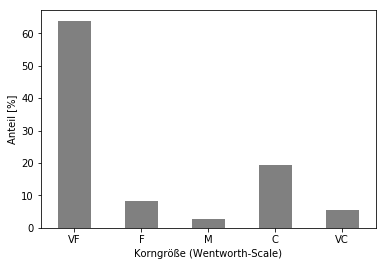

In [31]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Korngröße (Wentworth-Scale)')
plt.ylabel('Anteil [%]')
plt.show()

In [32]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungArt,,
S,28,77.777778
Schamott,5,13.888889
S/Gl,1,2.777778
S/Org/Schamott (?),1,2.777778
S/Schamott,1,2.777778


In [33]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.MagerungArt) LIKE '%Schamott%')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='right')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Ort,MagerungGröße,MagerungArt,MagerungDichte,Fabric,Typ
0,30.0,5.0,MBR,87/101,NaN,96,Maberu (Fpl. 235),C,Schamott,wenig,9a/1d (?),BDG/BBS (?)
1,31.0,5.0,MBR,87/101,NaN,111,Maberu (Fpl. 235),C,Schamott,viel,9a,BDG/BBS (?)
2,33.0,9.0,BGA,87/101,NaN,1,Bonga (Fpl. 238),VC,Schamott,sehr viel,9a,BDG
3,35.0,1.0,BBS,87/102,NaN,7,Bobusa (Fpl. 239),C,Schamott,wenig,9b,BBS/BDG (?)
4,55.0,4.0,PIK,87/101,NaN,26,Pikunda (Fpl. 255),VC,Schamott,sehr viel,9a,EBA/BDG (?)
5,NaN,NaN,PIK,87/101,NaN,232,Pikunda (Fpl. 255),C,S/Org/Schamott (?),viel,3b/8a (?),MDB/BDG (?)
6,NaN,NaN,PIK,87/101,NaN,22#,Pikunda (Fpl. 255),C,S/Schamott,mittel,8a/2a (?),BOT/BDG (?)


## Brennfarbe

In [34]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,8,12.307692
Sonstig,22,33.846154
Weiß,35,53.846154


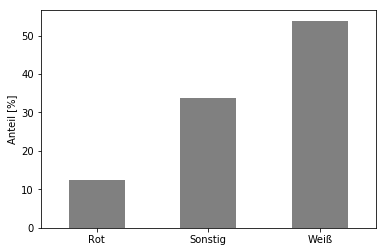

In [35]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [36]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

      64
      20
g      3
bg     2
g      1
s      1
dtype: int64

## Oberflächen

In [37]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Anzahl,Prozent
Obfl,,
außen glatt/innen rau,1,2.777778
glatt,32,88.888889
leicht rau,1,2.777778
rau,2,5.555556


In [38]:
a = pd.Series({'glatt':len(df.loc[df['Obfl'].str.contains("glatt")].index),
               'nicht glatt':len(df.loc[~df['Obfl'].str.contains("glatt")].index)})
a = pd.DataFrame(a)

a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
glatt,33,91.666667
nicht glatt,3,8.333333


## Wandung

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


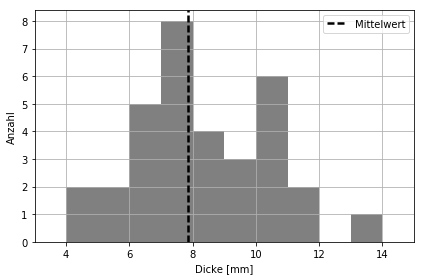

In [39]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%')
           AND (t_Obj.Wandung) < '15')""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

# Spannweite ermitteln und als bins nutzen
bins = df['Wandung'].max() - df['Wandung'].min()

mean = df['Wandung'].mean()

df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)
plt.xlabel("Dicke [mm]")
plt.ylabel("Anzahl")
plt.xlim([df['Wandung'].min()-1,df['Wandung'].max()+1])
legend = plt.legend(["Mittelwert"])
legend.get_frame().set_facecolor('white')
plt.tight_layout()

In [40]:
df['Wandung'].describe()

count    33.000000
mean      7.848485
std       2.223753
min       4.000000
25%       6.000000
50%       7.000000
75%      10.000000
max      14.000000
Name: Wandung, dtype: float64

In [41]:
df['Wandung'].var()

4.945075757575758

### Gefäßformen

In [42]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [43]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)

df_pivot['GefForm'] = df_pivot.index
a = pd.Series({'sicher':sum(df_pivot['objID'].loc[~df_pivot['GefForm'].str.contains(" ")]),
               'fraglich':sum(df_pivot['objID'].loc[df_pivot['GefForm'].str.contains(" ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,23,71.875
sicher,9,28.125


In [44]:
a[0].sum()

32

In [45]:
# alles fragliche einfach abschneiden und nur 1. Variante behalten:
df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
df['Form_Gef'] = df['Form_Gef'].apply(lambda x: x.split('/')[0])

In [46]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)

In [47]:
# mit .isin nur noch solche Einträge auswählen, die sicher 'Pikunda-Munda' sind (ohne ? oder anderen Kram)
dfFilter = [style]
df = df[df['Typ'].isin(dfFilter)]
# display(df1.head())
# display(df1.head())

In [48]:
df_pivot

,objID
Form_Gef,
C1,3
C2,25
D1,3
E1,1


In [49]:
df_pivot['objID'].sum()

32

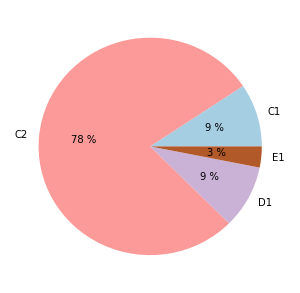

In [50]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
#plt.savefig('../output/figs/3-1-2-12_Epena_GefForm2.pdf', bbox_inches='tight')

## Mündungs- und Randformen

In [51]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

# Zeilen ohne Mdg löschen
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Mdg'])
df1['Form_Mdg'] = df1['Form_Mdg'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Mdg'] = df1['Form_Mdg'].apply(lambda x: x.split('/')[0])\

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot.head()

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M1,6,42.857143
M2,5,35.714286
M3,1,7.142857
M4,1,7.142857
M5,1,7.142857


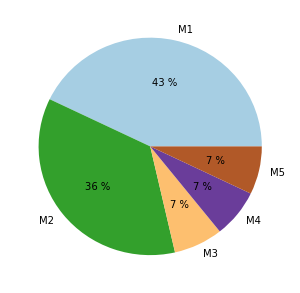

In [52]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [53]:
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Rand'])
df1['Form_Rand'] = df1['Form_Rand'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Rand'] = df1['Form_Rand'].apply(lambda x: x.split('/')[0])

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B1,6,40.000000
B2,5,33.333333
B1.4,2,13.333333
A1.1,1,6.666667
B3,1,6.666667


In [54]:
df_pivot['objID'].sum()

15

In [55]:
a = pd.Series({'ausbiegend':sum(df_pivot['objID'].loc[~df_pivot.index.str.contains("B")]),
               'nicht ausbiegend':sum(df_pivot['objID'].loc[df_pivot.index.str.contains("B")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
ausbiegend,1,6.666667
nicht ausbiegend,14,93.333333


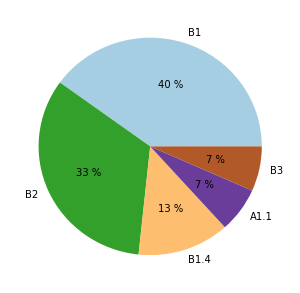

In [56]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


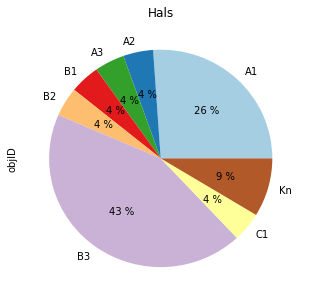

In [57]:
a = df.dropna(subset = ['Form_Hals'])
a['Form_Hals'] = a['Form_Hals'].map(lambda x: str(x)[:2])

df_pivot = a.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

In [58]:
df_pivot = pd.DataFrame(df_pivot)

a = pd.Series({'konvex':sum(df_pivot['objID'].loc[df_pivot.index.str.contains("A2|B2")]),
               'konkav':sum(df_pivot['objID'].loc[df_pivot.index.str.contains("A3|B3")]),
               'sonst':sum(df_pivot['objID'].loc[~df_pivot.index.str.contains("A2|A3|B2|B3")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
konkav,11,47.826087
konvex,2,8.695652
sonst,10,43.478261


C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


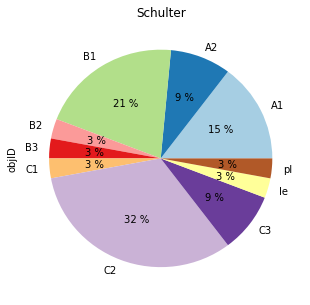

In [59]:
b = df.dropna(subset = ['Form_Schulter'])
b['Form_Schulter'] = b['Form_Schulter'].map(lambda x: str(x)[:2])

df_pivot = b.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

In [60]:
df_pivot = pd.DataFrame(df_pivot)

a = pd.Series({'Absatz':sum(df_pivot['objID'].loc[df_pivot.index.str.contains("B")]),
               'Leiste':sum(df_pivot['objID'].loc[df_pivot.index.str.contains("C")]),
               'sonst':sum(df_pivot['objID'].loc[~df_pivot.index.str.contains("B|C")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Absatz,9,26.470588
Leiste,15,44.117647
sonst,10,29.411765


## Boden

In [61]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden,
           t_Obj.Anzahl
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,ort_kurz,ort_name,objID,Typ,Form_Gef,Form_Boden,Anzahl
0,GMB,Gombe,1830,IMB/BDG (?),None,B12 (?),1


In [62]:
len(df['Form_Boden'])

1

## Verzierungen

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


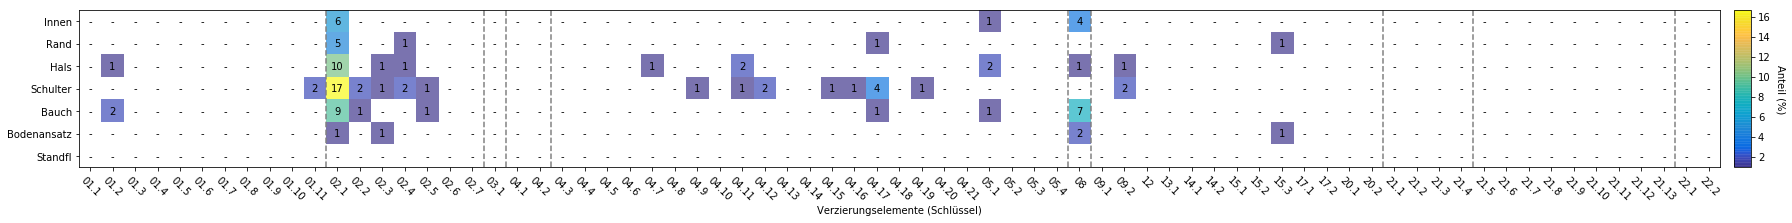

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-2-1-4_Bondongo_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [65]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
#display(df.head())

df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


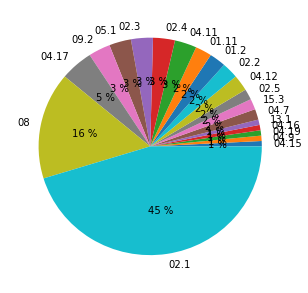

In [66]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%')
plt.ylabel('')

In [67]:
a = pd.Series({'Ritzungen und Riefen':len(df.loc[df['verzName'].str.contains("01.|02.")].index),
               'Eindrücke':len(df.loc[df['verzName'].str.contains("04.|04.")].index),
               'Sonstiges':len(df.loc[~df['verzName'].str.contains("01.|02.|04.|05.")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Eindrücke,19,15.573770
Ritzungen und Riefen,76,62.295082
Sonstiges,27,22.131148


In [68]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

,objID,Prozent
pos,,
1 Innen,14,11.111111
2 Rand,10,7.936508
3 Hals,24,19.047619
4 Schulter,44,34.920635
5 Bauch,29,23.015873
6 Bodenansatz,5,3.968254


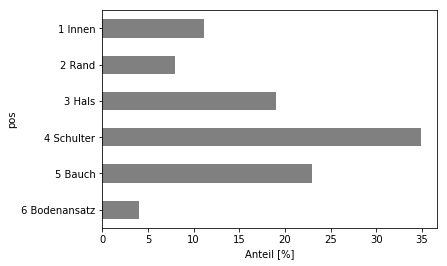

In [69]:
df_pivot = df_pivot.sort_index(ascending=False)

df_pivot.plot(y = 'Prozent', kind = 'barh', legend = None, color = 'grey')
plt.xlabel('Anteil [%]')
plt.show()

## Verbreitung

In [76]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
0,Bobangi (Fpl. 189),189,17.722248,-0.108898,BDG (?)
13,Zamba (Fpl. 191),191,17.884584,0.271798,BDG (?)
1,Loka (Fpl. 193),193,17.945614,0.320338,BDG
2,Ngbanja (Fpl. 199),199,18.092242,1.665022,BDG
6,Lukolela (Fpl. 234),234,17.175593,-1.062185,BDG (?)
7,Maberu (Fpl. 235),235,17.257014,-1.069018,BDG (?)
12,Sungu (Fpl. 236),236,17.334786,-1.033313,BDG (?)
4,Gombe (Fpl. 237),237,17.580406,-0.704069,BDG (?)
0,Bonga (Fpl. 238),238,16.873263,-1.117121,BDG
1,Bobusa (Fpl. 239),239,16.917098,-1.052349,BDG (?)


In [77]:
df.to_csv("../data/processed/3-2-1-4_BDG_Verbreitung.csv", index = False)

In [78]:
len(df)

14

## Tafeln

In [73]:
# damit alle Zeilen angezeigt werden:
pd.set_option('display.max_rows', None)

In [74]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Scherbe,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Scherbe,Typ,Form_Gef,Form_Rand,Form_Boden
0,3,1,ZAM,85/101,NaN,8,R,BDG (?),D1,None,None
1,4,1,LKA,85/101,NaN,31,R,BDG,C2,B1,None
2,4,3,LKA,85/101,NaN,3,W,BDG,C1 (?),None,None
3,6,11,NGB,85/101,NaN,38,R,BDG,C2 (?),A1.1,None
4,7,2,NGB,85/101,NaN,"135, 141",W,BDG,C2 (?),None,None
5,7,4,NGB,85/101,NaN,137,W,BDG,C2,None,None
6,7,5,NGB,85/101,134,"85, 104, 109, 110, 134, 136, 138, 140",W,BDG,C2 (?),None,None
7,7,6,NGB,85/101,136,"85, 104, 109, 110, 134, 136, 138, 140",W,BDG,C2 (?),None,None
8,7,10,NGB,85/101,138,"85, 104, 109, 110, 134, 136, 138, 140",W,BDG,C2 (?),None,None
9,7,7,NGB,85/101,NaN,140,W,BDG (?),None,None,None


In [75]:
len(df)

59